# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Russia (IMOEX.ME)

In [18]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [19]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Reading the datas (Source: Yahoo Finance)**

In [20]:
getSymbols("IMOEX.ME", from = '2000-01-01', to = '2021-10-31') 

Warning message:
“IMOEX.ME contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "IMOEX.ME"

**Checking data frequency**

In [21]:
periodicity(IMOEX.ME)        

Daily periodicity from 2013-03-05 to 2021-10-29 

**Identifying missing values (%)**

In [22]:
round(prop.table(table(is.na(IMOEX.ME)))*100, digits = 2)       


FALSE  TRUE 
98.25  1.75 

**Removing missing values**

In [23]:
IMOEX.ME <- na.omit(IMOEX.ME)    
round(prop.table(table(is.na(IMOEX.ME)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [24]:
IMOEX.ME.df <- IMOEX.ME[,'IMOEX.ME.Close']                              
head(IMOEX.ME.df)

           IMOEX.ME.Close
2013-03-05        1486.42
2013-03-06        1491.49
2013-03-07        1491.35
2013-03-11        1505.93
2013-03-12        1499.74
2013-03-13        1495.88

**Calculating log-returns**

In [25]:
logreturn <- diff(log(IMOEX.ME.df$IMOEX.ME.Close))*100                     
head(logreturn)

           IMOEX.ME.Close
2013-03-05             NA
2013-03-06    0.340503967
2013-03-07   -0.009387966
2013-03-11    0.972894949
2013-03-12   -0.411893033
2013-03-13   -0.257708731

**Aggregating the data**

In [26]:
IMOEX.ME.df$IMOEX.ME.Return <- logreturn                  
IMOEX.ME.df <- na.omit(IMOEX.ME.df)
head(IMOEX.ME.df)

           IMOEX.ME.Close IMOEX.ME.Return
2013-03-06        1491.49     0.340503967
2013-03-07        1491.35    -0.009387966
2013-03-11        1505.93     0.972894949
2013-03-12        1499.74    -0.411893033
2013-03-13        1495.88    -0.257708731
2013-03-14        1502.52     0.442904602

**Identifying missing values (%)**

In [27]:
round(prop.table(table(is.na(IMOEX.ME.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [28]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



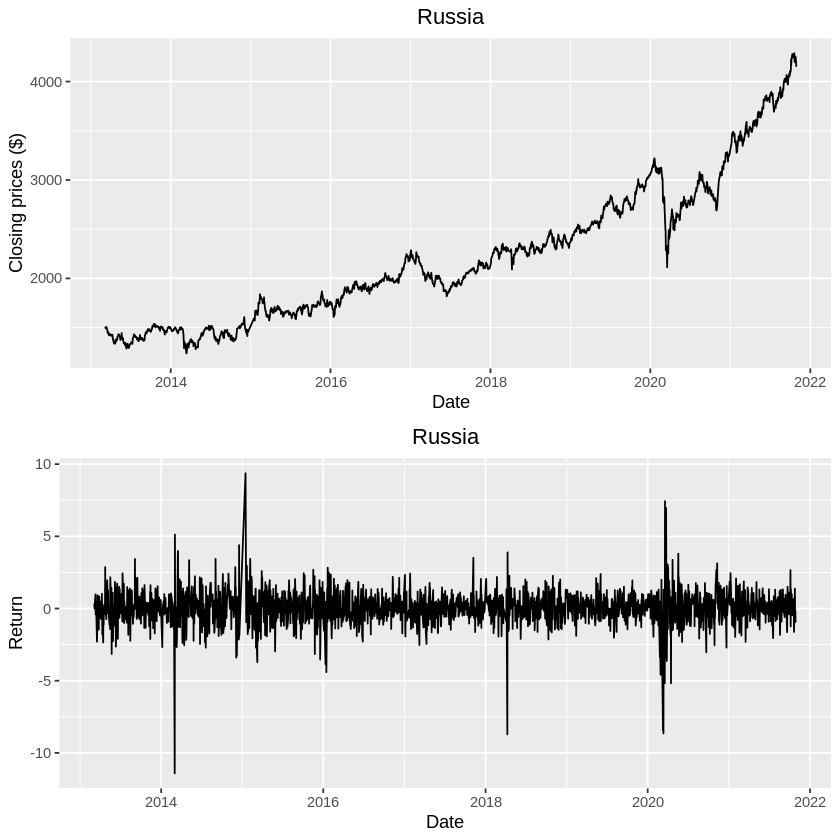

In [29]:
# Price chart
graph1 <- ggplot(IMOEX.ME.df,
                aes(x = index(IMOEX.ME.df), y = IMOEX.ME.df[,'IMOEX.ME.Close'])) +
                geom_line(color = "black") +
                ggtitle("Russia") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(IMOEX.ME.df,
                aes(x = index(IMOEX.ME.df), y = IMOEX.ME.df[,'IMOEX.ME.Return'])) +
                geom_line(color = "black") +
                ggtitle("Russia") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [30]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Descriptive statistic**

In [31]:
# mean
round(mean(IMOEX.ME.df$IMOEX.ME.Return), 3)                         

[1] 0.048

In [32]:
# sd
round(sd(IMOEX.ME.df$IMOEX.ME.Return), 3)                           

[1] 1.158

In [33]:
# skewness
round(skewness(IMOEX.ME.df$IMOEX.ME.Return), 3)                     

IMOEX.ME.Return 
          -0.66

In [34]:
# kurtosis
round(kurtosis(IMOEX.ME.df$IMOEX.ME.Return), 3)                     

IMOEX.ME.Return 
          15.45

In [35]:
# min
round(min(IMOEX.ME.df$IMOEX.ME.Return), 3)                          

[1] -11.419

In [36]:
# p5
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.05), 3)       

5% 
-1.641

In [37]:
# p25
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.25), 3)       

25% 
-0.551

In [38]:
# median
round(median(IMOEX.ME.df$IMOEX.ME.Return), 3)                       

[1] 0.055

In [39]:
# p75
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.75), 3)       

75% 
0.68

In [40]:
# p95
round(quantile(IMOEX.ME.df$IMOEX.ME.Return, probs = 0.95), 3)       

95% 
1.721

In [41]:
# max
round(max(IMOEX.ME.df$IMOEX.ME.Return), 3)                          

[1] 9.367

In [42]:
# n observations
length(IMOEX.ME.df$IMOEX.ME.Return)                                 

[1] 2136

## 4. Series normality analysis

In [43]:
# Package
library(tseries)

In [44]:
jarque.bera.test(IMOEX.ME.df$IMOEX.ME.Return)


	Jarque Bera Test

data:  IMOEX.ME.df$IMOEX.ME.Return
X-squared = 13951, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [45]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

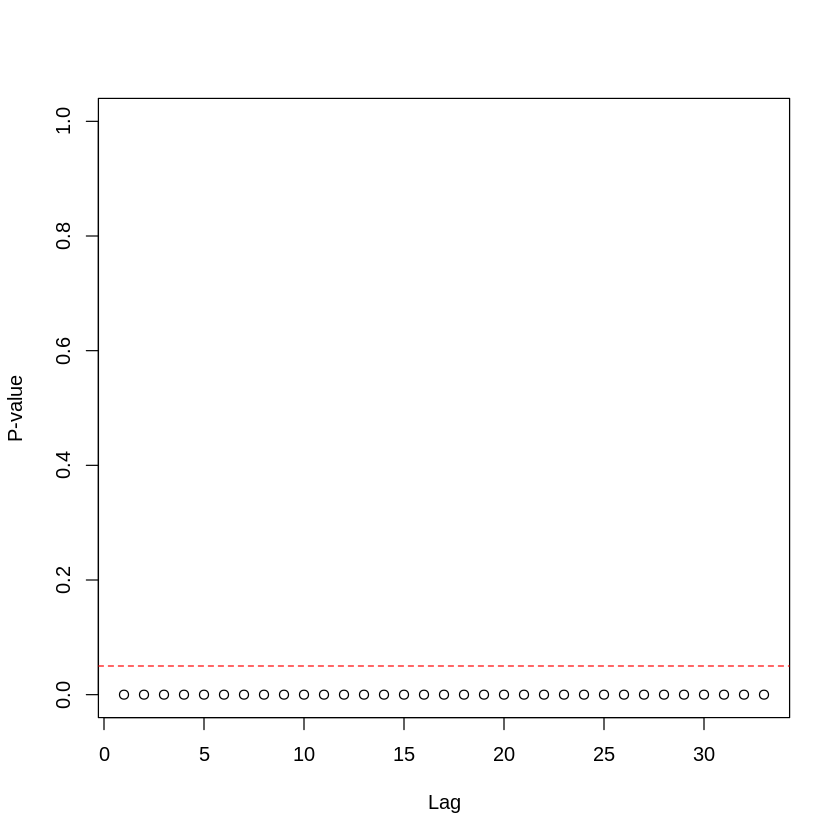

In [46]:
McLeod.Li.test(y = IMOEX.ME.df$IMOEX.ME.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [47]:
ArchTest(IMOEX.ME.df$IMOEX.ME.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  IMOEX.ME.df$IMOEX.ME.Return
Chi-squared = 164.4, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [48]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks base::date

In [49]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [50]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [51]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0590,0.0217,2.7211,0.0065
omega,0.0615,0.0146,4.2115,0.0000
alpha1,0.0908,0.0146,6.2234,0.0000
beta1,0.8624,0.0217,39.7113,0.0000
skew,0.8670,0.0223,38.9434,0.0000


In [52]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

IMOEX.ME.df$IMOEX.ME.VolGARCH <- as.numeric(var.garch)
head(IMOEX.ME.df)

[1] 1.3405256 1.2247352 1.1181051 1.1015962 1.0316279 0.9602589

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH
2013-03-06        1491.49     0.340503967         1.3405256
2013-03-07        1491.35    -0.009387966         1.2247352
2013-03-11        1505.93     0.972894949         1.1181051
2013-03-12        1499.74    -0.411893033         1.1015962
2013-03-13        1495.88    -0.257708731         1.0316279
2013-03-14        1502.52     0.442904602         0.9602589

**EGARCH model**

In [53]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [54]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0430,0.0174,2.4722,0.0134
omega,0.0104,0.0038,2.7581,0.0058
alpha1,-0.0927,0.0128,-7.2296,0.0000
beta1,0.9609,0.0078,122.8339,0.0000
gamma1,0.1473,0.0207,7.1331,0.0000
skew,0.8907,0.0230,38.6831,0.0000


In [55]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

IMOEX.ME.df$IMOEX.ME.VolEGARCH <- as.numeric(var.egarch)
head(IMOEX.ME.df)

[1] 1.3404320 1.2073004 1.0890152 1.0237391 1.0235335 0.9865905

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905

**GJR-GARCH model**

In [56]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [57]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0425,0.0216,1.9651,0.0494
omega,0.0538,0.0116,4.6416,0.0000
alpha1,0.0278,0.0119,2.3321,0.0197
beta1,0.8807,0.0181,48.5948,0.0000
gamma1,0.0996,0.0197,5.0483,0.0000
skew,0.8781,0.0228,38.5214,0.0000


In [58]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

IMOEX.ME.df$IMOEX.ME.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(IMOEX.ME.df)

[1] 1.3404378 1.2367707 1.1433460 1.0848316 1.0355063 0.9772424

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH
2013-03-06            1.3404378
2013-03-07            1.2367707
2013-03-11            1.1433460
2013-03-12            1.0848316
2013-03-13            1.0355063
2013-03-14            0.9772424

## 7. Realized GARCH model estimation

In [59]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [60]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, IMOEX.ME.df$IMOEX.ME.Return,
                          solver = 'hybrid',
                          realizedVol = IMOEX.ME.df$IMOEX.ME.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0247,0.0300,0.8226,0.4107
alpha1,0.9821,0.0648,15.1474,0.0000
beta1,0.0151,0.0216,0.6986,0.4848
eta11,0.0146,0.0031,4.7441,0.0000
eta21,0.0046,0.0008,5.5247,0.0000
delta,0.9641,0.0598,16.1122,0.0000
lambda,0.1366,0.0021,65.3562,0.0000
skew,0.8818,0.0217,40.7255,0.0000
xi,-0.0210,0.0297,-0.7077,0.4791


In [61]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

IMOEX.ME.df$IMOEX.ME.VolRealGARCH <- as.numeric(var.realgarch)
head(IMOEX.ME.df)

[1] 1.342717 1.372931 1.256791 1.147707 1.129511 1.058756

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH
2013-03-06            1.3404378              1.342717
2013-03-07            1.2367707              1.372931
2013-03-11            1.1433460              1.256791
2013-03-12            1.0848316              1.147707
2013-03-13            1.0355063              1.129511
2013-03-14            0.9772424              1.058756

**Realized EGARCH**

In [62]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, IMOEX.ME.df$IMOEX.ME.Return,
                            solver = 'hybrid',
                            realizedVol = IMOEX.ME.df$IMOEX.ME.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0208,0.0300,0.6947,0.4873
alpha1,1.0000,0.0608,16.4502,0.0000
beta1,0.0128,0.0227,0.5641,0.5727
eta11,0.0073,0.0032,2.3052,0.0212
eta21,0.0051,0.0010,5.0119,0.0000
delta,0.9484,0.0535,17.7382,0.0000
lambda,0.1423,0.0022,65.3587,0.0000
skew,0.8939,0.0223,40.0758,0.0000
xi,-0.0172,0.0290,-0.5916,0.5541


In [63]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

IMOEX.ME.df$IMOEX.ME.VolRealEGARCH <- as.numeric(var.realegarch)
head(IMOEX.ME.df)

[1] 1.342717 1.373808 1.237725 1.114968 1.046734 1.045677

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3404378              1.342717               1.342717
2013-03-07            1.2367707              1.372931               1.373808
2013-03-11            1.1433460              1.256791               1.237725
2013-03-12            1.0848316              1.147707               1.114968
2013-03-13            1.0355063              1.129511         

**Realized GJR-GARCH**

In [64]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, IMOEX.ME.df$IMOEX.ME.Return,
                              solver = 'hybrid',
                              realizedVol = IMOEX.ME.df$IMOEX.ME.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0245,0.0303,0.8067,0.4199
alpha1,0.9716,0.0632,15.3686,0.0000
beta1,0.0016,0.0221,0.0722,0.9425
eta11,0.0114,0.0032,3.5990,0.0003
eta21,0.0053,0.0009,5.6414,0.0000
delta,0.9892,0.0604,16.3668,0.0000
lambda,0.1417,0.0022,65.3596,0.0000
skew,0.8891,0.0221,40.2506,0.0000
xi,-0.0215,0.0304,-0.7081,0.4789


In [65]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

IMOEX.ME.df$IMOEX.ME.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(IMOEX.ME.df)

[1] 1.342717 1.362906 1.260405 1.167647 1.109406 1.060275

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3404378              1.342717               1.342717
2013-03-07            1.2367707              1.372931               1.373808
2013-03-11            1.1433460              1.256791               1.237725
2013-03-12            1.0848316              1.147707               1.114968
2013-03-13            1.0355063              1.129511         

## 8. Markov-Switching GARCH estimation

In [66]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [67]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [68]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0205     0.0054   3.8237 6.572e-05
alpha1_1   0.0308     0.0123   2.5044 6.133e-03
beta_1     0.9420     0.0063 149.0674    <1e-16
xi_1       0.9539     0.0310  30.8122    <1e-16
alpha0_2   5.0314   114.1944   0.0441 4.824e-01
alpha1_2   0.0000     0.0032   0.0109 4.956e-01
beta_2     0.6897     7.0419   0.0979 4.610e-01
xi_2       0.9297     0.1649   5.6395 8.527e-09
P_1_1      0.9959     0.0732  13.6072    <1e-16
P_2_1      0.1810     0.0026  69.5678    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [69]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

IMOEX.ME.df$IMOEX.ME.VolMSGARCH <- as.numeric(var.msgarch)
head(IMOEX.ME.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.0479691 1.0387960 0.9141878 0.9074545 0.8874360 0.8741721

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3404378              1.342717               1.342717
2013-03-07            1.2367707              1.372931               1.373808
2013-03-11            1.1433460              1.256791               1.237725
2013-03-12            1.0848316              1.147707               1.114968
2013-03-13            1.0355063              1.129511         

**MS EGARCH**

In [70]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [71]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0032     0.0021  -1.5538 6.012e-02
alpha1_1   0.0775     0.0145   5.3390 4.672e-08
alpha2_1  -0.0371     0.0108  -3.4479 2.825e-04
beta_1     0.9802     0.0048 202.3980    <1e-16
xi_1       0.9528     0.0336  28.3660    <1e-16
alpha0_2   0.1696     0.1241   1.3659 8.598e-02
alpha1_2  -0.0839     0.0894  -0.9392 1.738e-01
alpha2_2  -0.3837     0.1992  -1.9262 2.704e-02
beta_2     0.9008     0.0529  17.0439    <1e-16
xi_2       0.8218     0.1792   4.5856 2.263e-06
P_1_1      0.9941     0.0862  11.5344    <1e-16
P_2_1      0.1463     0.0042  3

In [72]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

IMOEX.ME.df$IMOEX.ME.VolMSEGARCH <- as.numeric(var.msegarch)
head(IMOEX.ME.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.0155721 0.9968561 0.9273842 0.9087105 0.8996286 0.8863124

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3404378              1.342717               1.342717
2013-03-07            1.2367707              1.372931               1.373808
2013-03-11            1.1433460              1.256791               1.237725
2013-03-12            1.0848316              1.147707               1.114968
2013-03-13            1.0355063              1.129511         

**MS GJR-GARCH**

In [73]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [74]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = IMOEX.ME.df$IMOEX.ME.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0229     0.0056   4.0866 2.188e-05
alpha1_1   0.0207     0.0097   2.1351 1.637e-02
alpha2_1   0.0255     0.0150   1.7013 4.444e-02
beta_1     0.9368     0.0065 143.6573    <1e-16
xi_1       0.9504     0.0314  30.2772    <1e-16
alpha0_2   0.7488     1.3097   0.5717 2.838e-01
alpha1_2   0.0000     0.0008   0.0058 4.977e-01
alpha2_2   0.0629     0.1374   0.4579 3.235e-01
beta_2     0.9338     0.1015   9.1967    <1e-16
xi_2       0.8523     0.1709   4.9877 3.055e-07
P_1_1      0.9948     0.0974  10.2168    <1e-16
P_2_1      0.2018     0.003

In [75]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

IMOEX.ME.df$IMOEX.ME.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(IMOEX.ME.df)

t=1       t=2       t=3       t=4       t=5       t=6 
1.1564828 1.1378583 0.9560620 0.9377535 0.9146704 0.8994867

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-06        1491.49     0.340503967         1.3405256          1.3404320
2013-03-07        1491.35    -0.009387966         1.2247352          1.2073004
2013-03-11        1505.93     0.972894949         1.1181051          1.0890152
2013-03-12        1499.74    -0.411893033         1.1015962          1.0237391
2013-03-13        1495.88    -0.257708731         1.0316279          1.0235335
2013-03-14        1502.52     0.442904602         0.9602589          0.9865905
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-06            1.3404378              1.342717               1.342717
2013-03-07            1.2367707              1.372931               1.373808
2013-03-11            1.1433460              1.256791               1.237725
2013-03-12            1.0848316              1.147707               1.114968
2013-03-13            1.0355063              1.129511         

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [76]:
# Total number of lines 
nrow(IMOEX.ME.df)                

[1] 2136

In [77]:
# Cut-line
round(nrow(IMOEX.ME.df)*0.7, digits = 0)

[1] 1495

In [78]:
# In-sample
IMOEX.ME.df.in <- IMOEX.ME.df[1:round(nrow(IMOEX.ME.df)*0.7, digits = 0),]
dim(IMOEX.ME.df.in)

[1] 1495   11

In [79]:
# Out-sample
IMOEX.ME.df.out <- IMOEX.ME.df[(round(nrow(IMOEX.ME.df)*0.7, digits = 0)+1):nrow(IMOEX.ME.df),]
dim(IMOEX.ME.df.out)

[1] 641  11

# 10. Forecast - GARCH models

In [80]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [82]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [83]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            IMOEX.ME.df$IMOEX.ME.Return,
                            out.sample = dim(IMOEX.ME.df.out)[1])

In [84]:
# Forecast calculated through adjustment
garch.pred <- ugarchforecast(garch.fit.pred,
                             n.ahead = 1,
                             n.roll = dim(IMOEX.ME.df.out)[1])

garch.forecast <- xts(sigma(garch.pred)[1,],
                      move(as.Date(names(sigma(garch.pred)[1,])), by = 1))

In [86]:
sigma.garch.pred <- ts(garch.forecast[-1,])
sigma.garch.true <- ts(IMOEX.ME.df.out$IMOEX.ME.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred,sigma.garch.true
1,0.8984181,0.5788120
2,0.8820501,0.6739212
3,0.8851112,0.6490326
4,0.8826238,0.6573722
5,0.8690124,0.6527471
6,0.8592776,0.6310044


**Performance evaluation**

In [87]:
# Forecast Error
garch.error <- sigma.garch[,'sigma.garch.pred'] - sigma.garch[,'sigma.garch.true']
head(garch.error)

A Time Series:
[1] 0.3196061 0.2081289 0.2360786 0.2252515 0.2162653 0.2282732

In [88]:
# Mean Square Error Loss
garch.mse <- MSE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mse, digits = 3)

[1] 2.372

In [89]:
# Mean Absolute Error Loss
garch.mae <- MAE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mae, digits = 3)    

[1] 0.484

In [90]:
# Root Mean Square Error Loss
garch.rmse <- RMSE(sigma.garch[,'sigma.garch.pred'], 
                   sigma.garch[,'sigma.garch.true'])
round(garch.rmse, digits = 3)

[1] 1.54

In [91]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3)

[1] 1.067

In [92]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3)

[1] 1.067

##(b) EGARCH

**Forecast**

In [93]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [94]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             IMOEX.ME.df$IMOEX.ME.Return,
                             out.sample = dim(IMOEX.ME.df.out)[1])

In [95]:
# Forecast calculated through adjustment
egarch.pred <- ugarchforecast(egarch.fit.pred,
                              n.ahead = 1,
                              n.roll = dim(IMOEX.ME.df.out)[1])

egarch.forecast <- xts(sigma(egarch.pred)[1,],
                       move(as.Date(names(sigma(egarch.pred)[1,])), by = 1))

In [96]:
sigma.egarch.pred <- ts(egarch.forecast[-1,])
sigma.egarch.true <- ts(IMOEX.ME.df.out$IMOEX.ME.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred,sigma.egarch.true
1,0.8049961,0.3959497
2,0.7803330,0.5612482
3,0.8261535,0.5263763
4,0.8077459,0.5942900
5,0.7829673,0.5658670
6,0.7914886,0.5306780


**Performance evaluation**

In [97]:
# Forecast Error
egarch.error <- sigma.egarch[,'sigma.egarch.pred'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error)

A Time Series:
[1] 0.4090465 0.2190848 0.2997772 0.2134558 0.2171004 0.2608106

In [98]:
# Mean Square Error Loss
egarch.mse <- MSE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse, digits = 3)

[1] 1.473

In [100]:
# Mean Square Error Loss Relative
egarch.mse.relative <- egarch.mse/garch.mse
round(egarch.mse.relative, digits = 3)

[1] 0.621

In [101]:
# Mean Absolute Error Loss
egarch.mae <- MAE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae, digits = 3)

[1] 0.413

In [102]:
# Mean Absolute Error Relative
egarch.mae.relative <- egarch.mae/garch.mae
round(egarch.mae.relative, digits = 3)

[1] 0.853

In [103]:
# Root Mean Square Error Loss
egarch.rmse <- RMSE(sigma.egarch[,'sigma.egarch.pred'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse, digits = 3)

[1] 1.214

In [104]:
# Root Mean Square Error Loss Relative
egarch.rmse.relative <- egarch.rmse/garch.rmse
round(egarch.rmse.relative, digits = 3)

[1] 0.788

In [105]:
# Quasi-likelihood loss function
h <- sigma.egarch[,'sigma.egarch.true']

h.hat <- sigma.egarch[,'sigma.egarch.pred']     
egarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(egarch.qlike, digits = 3)

[1] 1.025

In [106]:
# Diebold-Mariano test for predictive accuracy
e1 <- egarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -3.3542, Forecast horizon = 1, Loss function power = 2, p-value =
0.0008431
alternative hypothesis: two.sided


In [107]:
# Linear regression to assess forecast performance
egarch.model <- lm(sigma.egarch.true ~ sigma.egarch.pred, 
                   data = sigma.egarch)
round(coeftest(egarch.model, NeweyWest(egarch.model,
                                       lag = bwNeweyWest(egarch.model),
                                       prewhite = F)), 3)
round(summary(egarch.model)$adj.r.squared, 3)


t test of coefficients:

                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -2.799      0.388  -7.217 < 2.2e-16 ***
sigma.egarch.pred    3.834      0.396   9.693 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.87

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [108]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [109]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                IMOEX.ME.df$IMOEX.ME.Return,
                                out.sample = dim(IMOEX.ME.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = IMOEX.ME.df$IMOEX.ME.VolGARCH)

In [113]:
# Forecast calculated through adjustment
realgarch.pred <- ugarchforecast(realgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(IMOEX.ME.df.out)[1])

realgarch.forecast <- xts(sigma(realgarch.pred)[1,],
                          move(as.Date(names(sigma(realgarch.pred)[1,])), by = 1))

In [115]:
sigma.realgarch.pred <- ts(realgarch.forecast[-1,])
sigma.realgarch.true <- ts(IMOEX.ME.df.out$IMOEX.ME.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred,sigma.realgarch.true
1,0.7929922,0.6086545
2,0.8477317,0.5946226
3,0.8332968,0.6902062
4,0.8398153,0.6666628
5,0.8362853,0.6747211
6,0.8198591,0.6701801


**Performance evaluation**

In [116]:
# Forecast Error
realgarch.error <- sigma.realgarch[,'sigma.realgarch.pred'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error)

A Time Series:
[1] 0.1843376 0.2531090 0.1430906 0.1731525 0.1615642 0.1496790

In [117]:
# Mean Square Error Loss
realgarch.mse <- MSE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse, digits = 3)

[1] 2.672

In [118]:
# Mean Square Error Loss Relative
realgarch.mse.relative <- realgarch.mse/garch.mse
round(realgarch.mse.relative, digits = 3)

[1] 1.126

In [119]:
# Mean Absolute Error Loss
realgarch.mae <- MAE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae, digits = 3)

[1] 0.49

In [120]:
# Mean Absolute Error Loss Relative
realgarch.mae.relative <- realgarch.mae/garch.mae
round(realgarch.mae.relative, digits = 3)

[1] 1.012

In [121]:
# Root Mean Square Error Loss
realgarch.rmse <- RMSE(sigma.realgarch[,'sigma.realgarch.pred'],
                       sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse, digits = 3)

[1] 1.634

In [122]:
# Root Mean Square Error Loss Relative
realgarch.rmse.relative <- realgarch.rmse/garch.rmse
round(realgarch.rmse.relative, digits = 3)

[1] 1.061

In [123]:
# Quasi-likelihood loss function
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat <- sigma.realgarch[,'sigma.realgarch.pred']     
realgarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realgarch.qlike, digits = 3)

[1] 1.032

In [124]:
# Diebold-Mariano test for predictive accuracy
e1 <- realgarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 1.1231, Forecast horizon = 1, Loss function power = 2, p-value =
0.2618
alternative hypothesis: two.sided


In [125]:
# Linear regression to assess forecast performance
realgarch.model <- lm(sigma.realgarch.true ~ sigma.realgarch.pred,
                      data = sigma.realgarch)
round(coeftest(realgarch.model, NeweyWest(realgarch.model,
                                          lag = bwNeweyWest(realgarch.model),
                                          prewhite = F)), 3)
round(summary(realgarch.model)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -3.910      0.467  -8.366 < 2.2e-16 ***
sigma.realgarch.pred    5.007      0.473  10.591 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.901

##(b) Realized EGARCH

**Forecast**

In [126]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [127]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 IMOEX.ME.df$IMOEX.ME.Return,
                                 out.sample = dim(IMOEX.ME.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = IMOEX.ME.df$IMOEX.ME.VolEGARCH)

In [128]:
# Forecast calculated through adjustment
realegarch.pred <- ugarchforecast(realegarch.fit.pred,
                                  n.ahead = 1,
                                  n.roll = dim(IMOEX.ME.df.out)[1])

realegarch.forecast <- xts(sigma(realegarch.pred)[1,],
                           move(as.Date(names(sigma(realegarch.pred)[1,])), by = 1))

In [129]:
sigma.realegarch.pred <- ts(realegarch.forecast[-1,])
sigma.realegarch.true <- ts(IMOEX.ME.df.out$IMOEX.ME.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred,sigma.realegarch.true
1,0.6635611,0.4202324
2,0.7743739,0.3998138
3,0.7546709,0.5663629
4,0.7931970,0.5335494
5,0.7742744,0.6019276
6,0.7545222,0.5740258


**Performance evaluation**

In [130]:
# Forecast Error
realegarch.error <- sigma.realegarch[,'sigma.realegarch.pred'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error)

A Time Series:
[1] 0.2433287 0.3745601 0.1883080 0.2596477 0.1723468 0.1804964

In [131]:
# Mean Square Error Loss
realegarch.mse <- MSE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse, digits = 3)

[1] 1.744

In [132]:
# Mean Square Error Loss Relative
realegarch.mse.relative <- realegarch.mse/garch.mse
round(realegarch.mse.relative, digits = 3)

[1] 0.735

In [133]:
# Mean Absolute Error Loss
realegarch.mae <- MAE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae, digits = 3)

[1] 0.431

In [134]:
# Mean Absolute Error Relative
realegarch.mae.relative <- realegarch.mae/garch.mae
round(realegarch.mae.relative, digits = 3)

[1] 0.89

In [135]:
# Root Mean Square Error Loss 
realegarch.rmse <- RMSE(sigma.realegarch[,'sigma.realegarch.pred'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse, digits = 3)

[1] 1.321

In [136]:
# Root Mean Square Error Loss Relative
realegarch.rmse.relative <- realegarch.rmse/garch.rmse
round(realegarch.rmse.relative, digits = 3)

[1] 0.857

In [137]:
# Quasi-likelihood loss function
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat <- sigma.realegarch[,'sigma.realegarch.pred']     
realegarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realegarch.qlike, digits = 3)

[1] 1.003

In [138]:
# Diebold-Mariano test for predictive accuracy - test 2
e1 <- realegarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -2.3188, Forecast horizon = 1, Loss function power = 2, p-value =
0.02072
alternative hypothesis: two.sided


In [139]:
# Linear regression to assess forecast performance
realegarch.model <- lm(sigma.realegarch.true ~ sigma.realegarch.pred,
                       data = sigma.realegarch)
round(coeftest(realegarch.model, NeweyWest(realegarch.model,
                                           lag = bwNeweyWest(realegarch.model),
                                           prewhite = F)), 3)
round(summary(realegarch.model)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.121      0.457  -6.834 < 2.2e-16 ***
sigma.realegarch.pred    4.263      0.470   9.068 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.873

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [140]:
IMOEX.ME.df.month <- apply.monthly(IMOEX.ME.df, FUN = mean)
head(IMOEX.ME.df.month)

           IMOEX.ME.Close IMOEX.ME.Return IMOEX.ME.VolGARCH IMOEX.ME.VolEGARCH
2013-03-28       1468.725     -0.22718297          1.156242           1.305953
2013-04-30       1384.006     -0.16078890          1.154582           1.488807
2013-05-31       1399.154     -0.14893703          1.495428           1.448679
2013-06-28       1317.946     -0.05016823          1.625201           2.109388
2013-07-31       1382.315      0.14883481          1.152935           1.067793
2013-08-30       1383.931     -0.04329742          1.068751           1.157798
           IMOEX.ME.VolGJRGARCH IMOEX.ME.VolRealGARCH IMOEX.ME.VolRealEGARCH
2013-03-28             1.276738              1.192257               1.315420
2013-04-30             1.342611              1.179670               1.546146
2013-05-31             1.411254              1.501960               1.441187
2013-06-28             1.894347              1.690361               2.200922
2013-07-31             1.022412              1.203236         

##(b) Lag Length Selection

In [141]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [142]:
lags.select(IMOEX.ME.df.month$IMOEX.ME.VolGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [143]:
lags.select(IMOEX.ME.df.month$IMOEX.ME.VolEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [144]:
lags.select(IMOEX.ME.df.month$IMOEX.ME.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [145]:
lags.select(IMOEX.ME.df.month$IMOEX.ME.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

##(c) Import dataset

**EPU**

In [146]:
# Package
library(readxl)

In [147]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [148]:
attach(EPU)

**VIX**

In [149]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-10-31', periodicity = "monthly")

[1] "^VIX"

In [150]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [151]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [152]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(EPU$Russia, 1))
lag.gepu <- ts(Lag(EPU$GEPU_current, 1))
lag.vix <- ts(Lag(VIX$VIX.Close, 1))

**Linear GARCH**

In [153]:
# Estimation 1 - GARCH (Best BIC:  lag= 1)
garch <- ts(log(IMOEX.ME.df.month$IMOEX.ME.VolGARCH))
lag.garch.1 <- ts(Lag(log(IMOEX.ME.df.month$IMOEX.ME.VolGARCH), 1))

ols.garch <- cbind(garch, lag.garch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.061      0.043   1.431    0.156    
lag.garch.1    0.548      0.077   7.150   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.293

In [154]:
# Estimation 2 - GARCH (Best BIC:  lag= 1)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.133      0.087   1.535    0.128    
lag.garch.1    0.550      0.080   6.859   <2e-16 ***
lag.epu       -0.001      0.001  -0.832    0.407    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.291

In [155]:
# Estimation 3 - GARCH (Best BIC:  lag= 1)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.179      0.184  -0.975    0.332    
lag.garch.1    0.517      0.082   6.271   <2e-16 ***
lag.vix        0.012      0.009   1.363    0.176    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.312

In [156]:
# Estimation 4 - GARCH (Best BIC:  lag= 1)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.136      0.247  -0.549    0.585    
lag.garch.1    0.519      0.086   6.030   <2e-16 ***
lag.epu        0.000      0.001  -0.323    0.747    
lag.vix        0.012      0.010   1.211    0.229    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.306

In [157]:
# Estimation 5 - GARCH (Best BIC:  lag= 1)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.157      0.265  -0.591    0.556    
lag.garch.1    0.515      0.089   5.795   <2e-16 ***
lag.epu       -0.001      0.001  -0.428    0.670    
lag.gepu       0.002      0.003   0.535    0.594    
lag.vix        0.007      0.009   0.729    0.468    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.302

**EGARCH**

In [158]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(IMOEX.ME.df.month$IMOEX.ME.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(IMOEX.ME.df.month$IMOEX.ME.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.051      0.042   1.195    0.235    
lag.egarch.1    0.544      0.064   8.544   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.289

In [159]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.137      0.081   1.698    0.093 .  
lag.egarch.1    0.547      0.067   8.163   <2e-16 ***
lag.epu        -0.001      0.001  -1.053    0.295    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.288

In [160]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.171      0.153  -1.120    0.265    
lag.egarch.1    0.508      0.074   6.865   <2e-16 ***
lag.vix         0.011      0.008   1.523    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.304

In [161]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.101      0.238  -0.425    0.672    
lag.egarch.1    0.513      0.079   6.451   <2e-16 ***
lag.epu        -0.001      0.001  -0.518    0.606    
lag.vix         0.011      0.009   1.222    0.225    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.299

In [162]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.111      0.234  -0.472    0.638    
lag.egarch.1    0.513      0.081   6.370   <2e-16 ***
lag.epu        -0.001      0.001  -0.602    0.549    
lag.gepu        0.001      0.003   0.282    0.779    
lag.vix         0.008      0.009   0.886    0.378    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.293

**Realized Linear GARCH**

In [163]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 1)
realgarch <- ts(log(IMOEX.ME.df.month$IMOEX.ME.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(IMOEX.ME.df.month$IMOEX.ME.VolRealGARCH), 1))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.071      0.044   1.637    0.105    
lag.realgarch.1    0.555      0.074   7.476   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.301

In [164]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.139      0.086   1.627    0.107    
lag.realgarch.1    0.557      0.077   7.211   <2e-16 ***
lag.epu           -0.001      0.001  -0.795    0.428    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.298

In [165]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.160      0.179  -0.894    0.374    
lag.realgarch.1    0.525      0.079   6.628   <2e-16 ***
lag.vix            0.012      0.009   1.348    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.318

In [166]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.120      0.243  -0.495    0.622    
lag.realgarch.1    0.527      0.084   6.308   <2e-16 ***
lag.epu            0.000      0.001  -0.302    0.763    
lag.vix            0.011      0.010   1.185    0.239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.312

In [167]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 1)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.141      0.256  -0.550    0.583    
lag.realgarch.1    0.523      0.085   6.134   <2e-16 ***
lag.epu           -0.001      0.001  -0.403    0.688    
lag.gepu           0.002      0.003   0.547    0.586    
lag.vix            0.007      0.009   0.709    0.480    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.308

**Realized EGARCH**

In [168]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(IMOEX.ME.df.month$IMOEX.ME.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(IMOEX.ME.df.month$IMOEX.ME.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.060      0.044   1.366    0.175    
lag.realegarch.1    0.549      0.063   8.678   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.294

In [169]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.143      0.082   1.746    0.084 .  
lag.realegarch.1    0.552      0.066   8.342   <2e-16 ***
lag.epu            -0.001      0.001  -0.993    0.323    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.293

In [170]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.163      0.152  -1.072    0.286    
lag.realegarch.1    0.514      0.072   7.147   <2e-16 ***
lag.vix             0.012      0.007   1.545    0.126    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.309

In [171]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.099      0.236  -0.419    0.676    
lag.realegarch.1    0.518      0.077   6.680   <2e-16 ***
lag.epu            -0.001      0.001  -0.468    0.641    
lag.vix             0.011      0.009   1.251    0.214    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.304

In [172]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.107      0.231  -0.463    0.645    
lag.realegarch.1    0.518      0.078   6.626   <2e-16 ***
lag.epu            -0.001      0.001  -0.544    0.588    
lag.gepu            0.001      0.003   0.238    0.812    
lag.vix             0.009      0.009   0.970    0.334    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.297